In [22]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
%cd /Users/abhilashsinghme/Downloads

/Users/abhilashsinghme/Downloads


In [23]:
# Reading the united kingdom sales data

uk_df = pd.read_csv('uk.csv')
uk_df['InvoiceDate'] = pd.to_datetime(uk_df['InvoiceDate'])
uk_df.set_index('InvoiceDate', inplace = True)

uk_df

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
InvoiceDate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085,United Kingdom,83.4
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085,United Kingdom,81.0
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085,United Kingdom,81.0
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085,United Kingdom,100.8
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085,United Kingdom,30.0
...,...,...,...,...,...,...,...,...
2011-12-09 12:31:00,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95,15804,United Kingdom,23.4
2011-12-09 12:49:00,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95,13113,United Kingdom,23.6
2011-12-09 12:49:00,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,1.25,13113,United Kingdom,30.0


Text(0.5, 1.0, 'UK Biweekly Total Revenue')

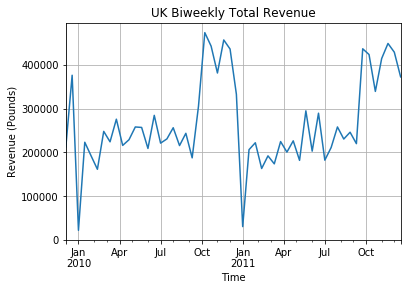

In [71]:
# Biweekly Revenue Sum

uk_df.resample('2W').Revenue.sum().plot(grid = True)
plt.xlabel('Time')
plt.ylabel('Revenue (Pounds)')
plt.title('UK Biweekly Total Revenue')

Text(0.5, 1.0, 'UK Biweekly Transactions')

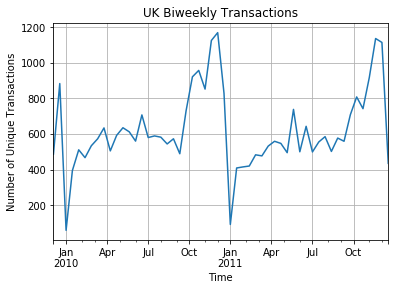

In [72]:
# Biweekly Number of Unique Transactions

uk_df.resample('2W').Invoice.nunique().plot(grid = True)
plt.xlabel('Time')
plt.ylabel('Number of Unique Transactions')
plt.title('UK Biweekly Transactions')

In [26]:
# Lets subset for the calender year (Jan 2010 - Jan 2012)

uk_dfts = uk_df.resample('2W').Revenue.sum().loc['2010':'2013']

Text(0.5, 1.0, 'UK Biweekly Total Revenue')

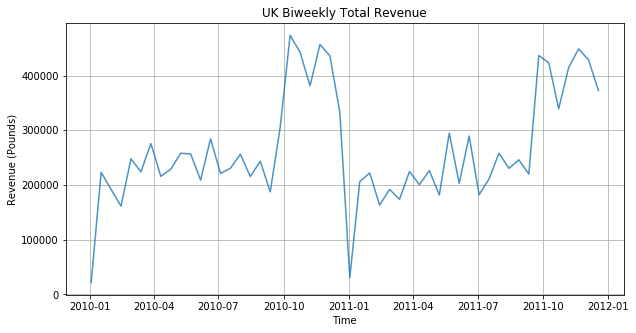

In [30]:
# Biweekly Revenue Sum

plt.figure(figsize = (10,5))
train = uk_dfts[:26]
test = uk_dfts[26:]
plt.plot(uk_dfts, alpha = 0.8)
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Revenue (Pounds)')
plt.title('UK Biweekly Total Revenue')


The time series seems to follow no rising or falling trend. However, there seems to be a weak seasonality in the revenue generated biweekly.

Additionally, the store seems to close operations during the final week of the year. The Revenue majorly rise during the final quarter of the year. Maybe, as holidays are near, more retailers tend to stockpile products as it might be cheaper for them to buy around this time. 

### Benchmark Models

"It is important to establish a strong baseline of performance on a time series forecasting problem and to not fool yourself into thinking that sophisticated methods are skillful, when in fact they are not.

This requires that you evaluate a suite of standard naive, or simple, time series forecasting models to get an idea of the worst acceptable performance on the problem for more sophisticated models to beat." - Jason Brownlee

Link - https://machinelearningmastery.com/simple-time-series-forecasting-models/

In [31]:
# DEFINING OUR BASELINE FORCASTING FUNCTIONS

#### a) Naive Forecast
#### a) Mean Forecast
#### a) Drift Forecast
#### a) Seasonal Naive Forecast


In [35]:
# NAIVE FORECAST

def naive_f(train, test):
    
    # Its basically same as the last value
    
    forecast = test.copy()
    for i in forecast.index:
        forecast[i]=train[-1]
    
    return forecast
    

yhat_naive = naive_f(train,test)


# RMSE Naive

rms_naive = sqrt(mean_squared_error(test, yhat_naive))
print(rms_naive)




124127.92088643469


In [34]:
# MEAN FORECAST

def mean_f(train, test):
    
    # Its basically same as the last value
    
    forecast = test.copy()
    for i in forecast.index:
        forecast[i]=test.mean()
    
    return forecast
    
yhat_mean = mean_f(train, test)
rms_mean = sqrt(mean_squared_error(test, yhat_mean))
print(rms_mean)

102203.51612421534


In [33]:
# DRIFT FORECAST

def drift_m(train, test):
    
    avg_drift = (train[-1] - train[0])/len(train)
    
    forecast = test.copy()
    
    multiplier = (train[-1] + avg_drift)
    
    for i in forecast.index:
        
        forecast[i] = multiplier
        
        multiplier = (forecast[i] + avg_drift)
        
    return forecast

yhat_drift = drift_m(train, test)
rms_drift = sqrt(mean_squared_error(test, yhat_drift))
print(rms_drift)


239147.04610753834


In [32]:
# Seasonal Naive



def snaive(data, test, period): # Period - Period of Seasonality
    
    forecast = data.shift(period)[len(train):]
    return forecast
    


yhat_snaive = snaive(uk_dfts, test, 26)
rms_snaive = sqrt(mean_squared_error(test, yhat_snaive))
print(rms_snaive)      

45361.78738081454


Text(0.5, 1.0, 'UK Biweekly Total Revenue')

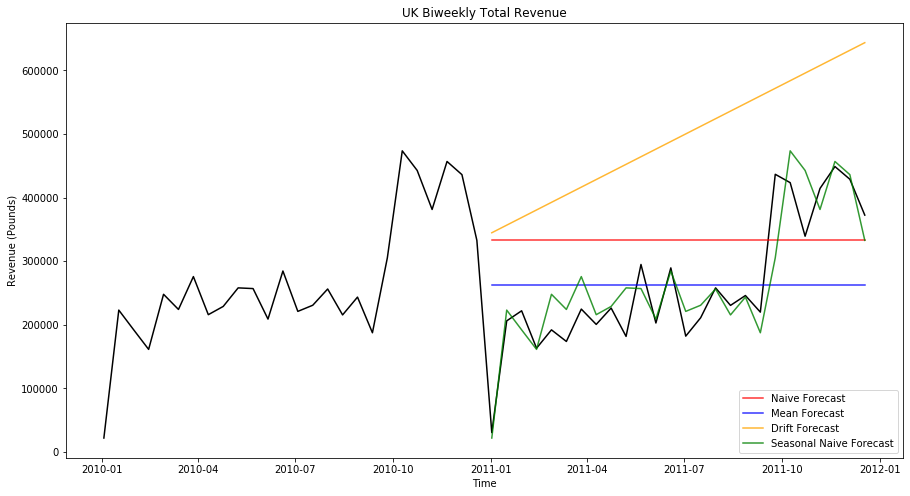

In [36]:
# Plots
plt.figure(figsize=(15,8))
plt.plot(uk_dfts, color = 'black')
plt.plot(yhat_naive, color = 'red', alpha = 0.8, label = 'Naive Forecast')
plt.plot(yhat_mean, color = 'blue', alpha = 0.8, label = 'Mean Forecast')
plt.plot(yhat_drift, color = 'orange', alpha = 0.8, label = 'Drift Forecast')
plt.plot(yhat_snaive, color = 'green', alpha = 0.8, label = 'Seasonal Naive Forecast')
plt.legend(loc = 'lower right')
plt.xlabel('Time')
plt.ylabel('Revenue (Pounds)')
plt.title('UK Biweekly Total Revenue')


In [38]:
print("Accuracy of Baseline Models:\n")
print("RMSE OF MEAN FORECAST IS {:.2f}".format(rms_mean))
print("RMSE OF NAIVE FORECAST IS {:.2f}".format(rms_naive))
print("RMSE OF DRIFT FORECAST IS {:.2f}".format(rms_drift))
print("RMSE OF SEASONAL NAIVE FORECAST IS {:.2f}".format(rms_snaive))

Accuracy of Baseline Models:

RMSE OF MEAN FORECAST IS 102203.52
RMSE OF NAIVE FORECAST IS 124127.92
RMSE OF DRIFT FORECAST IS 239147.05
RMSE OF SEASONAL NAIVE FORECAST IS 45361.79


### Walk Forward Validation For Seasonal Naive



Here we can see that the rmse value for our seasonal naive method is the lowest among all. Even from the graph, we are able to view that the predictions fit the test data well.

However, in our seasonal naive forecast of biweekly revenue stream (26 observation in an year), the period from where we expect our seasonality to occur is yearly. Hence the total observations are 26.

What if there was another lag for which the predictions would have been more better (Lower RMSE) ?

Lets test that.

Code Link here - https://machinelearningmastery.com/simple-time-series-forecasting-models/

t=1 RMSE:96577.469
t=2 RMSE:115296.086
t=3 RMSE:126228.770
t=4 RMSE:129153.094
t=5 RMSE:149357.147
t=6 RMSE:170802.578
t=7 RMSE:162727.492
t=8 RMSE:158439.107
t=9 RMSE:159172.562
t=10 RMSE:163733.301
t=11 RMSE:159875.021
t=12 RMSE:158905.790
t=13 RMSE:148150.441
t=14 RMSE:159406.458
t=15 RMSE:158702.389
t=16 RMSE:162567.292
t=17 RMSE:161414.008
t=18 RMSE:159558.560
t=19 RMSE:170859.382
t=20 RMSE:167740.639
t=21 RMSE:145118.925
t=22 RMSE:139212.934
t=23 RMSE:129949.568
t=24 RMSE:114583.490
t=25 RMSE:94977.231
t=26 RMSE:45361.787


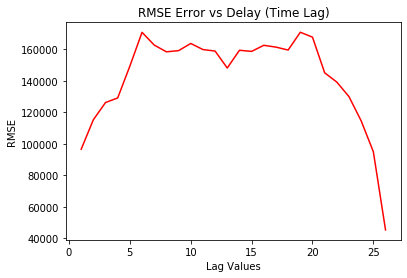

In [70]:
lag_val = range(1, 27)
scores = []
for t in lag_val:

    # walk-forward validation
    history = [x for x in train]
    predictions = list()
    for i in range(len(test)):
        # make prediction
        yhat = history[-t]
        predictions.append(yhat)
        # observation
        history.append(test[i])
        # report performance
    rmse = sqrt(mean_squared_error(test, predictions))
    scores.append(rmse)
    print('t=%d RMSE:%.3f' % (t, rmse))
    
# plot scores over persistence values
plt.plot(lag_val, scores, color = 'r')
plt.xlabel('Lag Values')
plt.ylabel('RMSE')
plt.title('RMSE Error vs Delay (Time Lag)')
plt.show()

Based on the plot, we can confirm that at delay of 26 and on the basis of yearly seasonality, our seasonal naive model has the lowest rmse among all levels of delay.

### Residual Analysis (Seasonal Naive)


In [46]:
# RESIDUAL ANALYSIS

residual_snaive = (test - predictions)


Text(0, 0.5, 'Residuals')

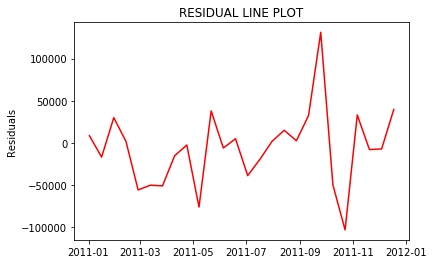

In [65]:
# RESIDUAL LINE PLOT

plt.plot(residual_snaive, color = 'r')
plt.title('RESIDUAL LINE PLOT')
plt.ylabel('Residuals')

[ 1.          0.01557432 -0.25357756  0.10017434 -0.06994076 -0.09826995
 -0.00433839  0.07592202  0.14350538  0.04305783 -0.19985823 -0.09135074
  0.04845118 -0.19946325 -0.08306355  0.03252463  0.08028774  0.14653231
 -0.10512944 -0.05015603 -0.00329075 -0.08014371  0.01782199  0.03142597
 -0.00962534  0.01292999]


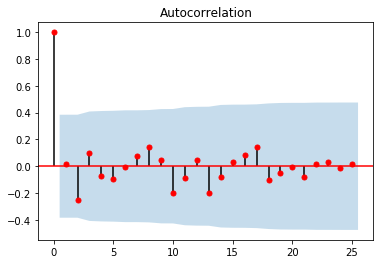

In [66]:
# AUTOCORRELATION PLOT

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(residual_snaive)
print(acf_array)

# Plot the acf function
plot_acf(residual_snaive, alpha = 0.05, lags = 25, color = 'r')
plt.show()

Text(0.5, 1.0, 'RESID PLOT AGAINST PREDICTORS')

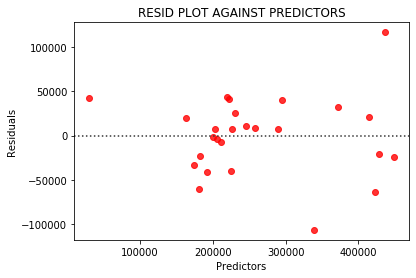

In [67]:
# Residual Plots against fitted 

sns.residplot(test,residual_snaive, color = 'r')
plt.xlabel('Predictors')
plt.ylabel('Residuals')
plt.title('RESID PLOT AGAINST PREDICTORS')


Text(0.5, 1.0, 'RESID PLOT AGAINST RESIDUALS')

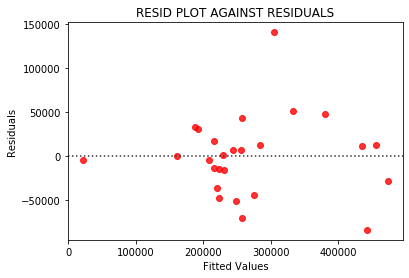

In [68]:
sns.residplot(predictions,residual_snaive, color = 'r')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('RESID PLOT AGAINST RESIDUALS')

Text(0.5, 1.0, 'Revenue Residual Distplot')

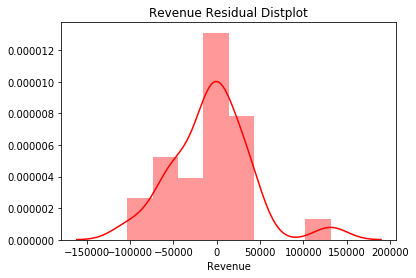

In [69]:
# Residual Histogram

sns.distplot(residual_snaive, color = 'r')
plt.title('Revenue Residual Distplot')

In [52]:
# Ljung - Box Test - The second array are the p -values.

from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(residual_snaive, lags = 25)



(array([7.06333493e-03, 1.95754461e+00, 2.27517098e+00, 2.43704211e+00,
        2.77181752e+00, 2.77250263e+00, 2.99336071e+00, 3.82626530e+00,
        3.90565912e+00, 5.72307983e+00, 6.12808849e+00, 6.25015937e+00,
        8.47815229e+00, 8.89672522e+00, 8.96673578e+00, 9.43601344e+00,
        1.11728368e+01, 1.21785869e+01, 1.24402121e+01, 1.24415261e+01,
        1.33767168e+01, 1.34345243e+01, 1.36741798e+01, 1.37079034e+01,
        1.38296138e+01]),
 array([0.93302173, 0.37577215, 0.51729417, 0.65594373, 0.73511425,
        0.83681044, 0.88561574, 0.87244826, 0.91751128, 0.83796752,
        0.86468246, 0.90295001, 0.81111609, 0.83760889, 0.8792503 ,
        0.8943777 , 0.84743925, 0.83788143, 0.86595673, 0.90004139,
        0.8948568 , 0.92032983, 0.93582313, 0.95297477, 0.9646217 ]))